In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import datetime
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras import Sequential
from sklearn.model_selection import  train_test_split

from timeanalysis import Timeseries

In [2]:
init_notebook_mode(connected=True)

In [3]:
aapl  = pd.read_csv('Data/AAPL_Historic_Prices.csv')

In [4]:
Timeseries.plot_ohlc_candlestick(aapl,'Date','Open','High','Low','Close')

In [5]:
Timeseries.plot_ohlc_line(aapl,'Date','Open','High','Low','Close')

In [6]:
Timeseries.test_stationarity(aapl,'Date','Close',30)

******************************
H0: Not Stationary
H1: Stationary
Results of Dickey-Fuller Test:
Test Statistic                  -2.001412
p-value                          0.285954
#Lags Used                       8.000000
Number of Observations Used    493.000000
Critical Value (1%)             -3.443684
Critical Value (5%)             -2.867420
Critical Value (10%)            -2.569902
dtype: float64
******************************
H0: Stationary
H1: Not Stationary
Results of KPSS Test:
Test Statistic            2.147804
p-value                   0.010000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Ravi.RAVI-DRAGOON\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning:

p-value is smaller than the indicated p-value



In [34]:
stock = aapl['Close'].values.astype('float32')
stock = stock.reshape(502, 1)
stock.shape

(502, 1)

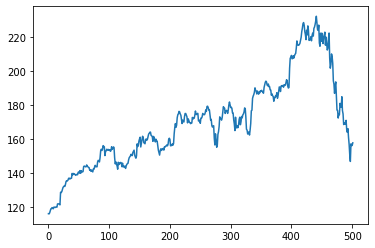

In [35]:
plt.plot(stock)

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
stock = scaler.fit_transform(stock)

In [37]:
train_size = int(len(stock) * 0.80)
test_size = len(stock) - train_size
train, test = stock[0:train_size,:], stock[train_size:len(stock),:]
print(len(train), len(test))

401 101


In [38]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [40]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [41]:
trainX.shape

(393, 7, 1)

In [42]:
model = Sequential()

model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1],1) ,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='rmsprop',metrics=['mse'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 7, 50)             10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(trainX,trainY,epochs=5,batch_size=7,validation_data=(testX,testY),shuffle=False)

Train on 393 samples, validate on 93 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
393/393 [==============================] - 7s 17ms/sample - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 2/5
393/393 [==============================] - 2s 6ms/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 3/5
393/393 [==============================] - 2s 6ms/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 4/5
393/393 [==============================] - 2s 6ms/sample - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 5/5
393/393 [==============================] - 2s 6ms/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
